<a href="https://colab.research.google.com/github/GiuBuonafina/Classificacao_Naive_Bayes/blob/main/Classifica%C3%A7%C3%A3o_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pré-processamento dos dados**





In [ ]:
#Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Carregamento da base de dados
base_credit = pd.read_csv('/content/credit_data.csv')

In [ ]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


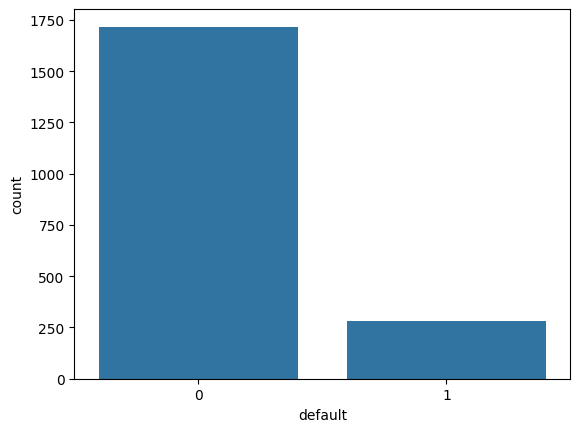

In [ ]:
#Visualização dos rótulos
sns.countplot(x = base_credit['default']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income'])
grafico.show()

## Corrigindo valores negativos e ausentes



In [ ]:
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
base_credit[base_credit['age'] > 0].mean()

clientid     1003.431795
income      45328.856915
age            40.927700
loan         4443.240892
default         0.141926
dtype: float64

In [ ]:
base_credit.age[base_credit['age'] < 0] = 40.92

<ipython-input-15-c6fd287c3820>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         6
loan        0
default     0
dtype: int64

In [ ]:
base_credit.age.fillna(40.92, inplace = True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


## Divisão dos previsores e da classe

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values
Y_credit = base_credit.iloc[:, 4].values

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

## Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit

array([[ 1.45393393,  1.3653818 ,  1.20281942],
       [-0.76217555,  0.54266107,  0.69642695],
       [ 0.83682073,  1.67417276,  1.17471147],
       ...,
       [-0.07122592, -0.97448432,  0.35420081],
       [-0.11000289,  1.73936826, -0.92675625],
       [ 1.682986  ,  1.14917726,  0.96381038]])

## Divisão da base de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, Y_credit, test_size = 0.25, random_state = 0)

## Salvando as bases

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

# **Algoritmo Naive Bayes**

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)


GaussianNB()

In [ ]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [ ]:
#Resultado das previsões
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Avaliação do modelo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Taxa de acurácia
accuracy_score(y_credit_teste, previsoes)

0.938

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

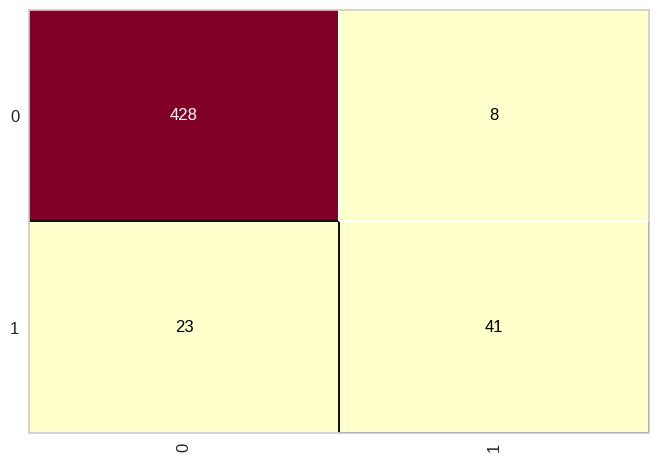

In [ ]:
# Matriz de confusão e acurácia
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

